In [57]:
# Imports
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize

In [49]:
# Load the data
headlines_df = pd.read_json("data/headlines.json", lines=True)
headlines_df.head()

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...


In [50]:
# Check for NaN values
headlines_df.isna().sum()

is_sarcastic    0
headline        0
article_link    0
dtype: int64

In [51]:
# Explore distribution
headlines_df['is_sarcastic'].value_counts()

0    14985
1    13634
Name: is_sarcastic, dtype: int64

<Axes: xlabel='is_sarcastic', ylabel='count'>

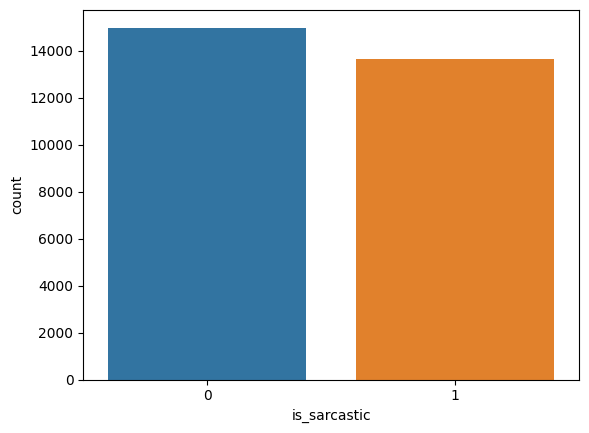

In [52]:
sns.countplot(x='is_sarcastic', data=headlines_df)

In [53]:
# Most common words in non-sarcastic headlines
stop = set(stopwords.words('english'))
common_words_ns = ' '.join(headlines_df[headlines_df.is_sarcastic == 0].headline).split()
common_words_ns = [word for word in common_words_ns if word not in stop]
common_words_ns = pd.Series(common_words_ns)
print(common_words_ns.value_counts()[:10])

trump      957
new        664
donald     453
trump's    364
says       346
women      240
one        234
u.s.       223
first      220
make       209
dtype: int64


In [54]:
# Most common words in sarcastic headlines
common_words_s = ' '.join(headlines_df[headlines_df.is_sarcastic == 1].headline).split()
common_words_s = [word for word in common_words_s if word not in stop]
common_words_s = pd.Series(common_words_s)
print(common_words_s.value_counts()[:10])

man        1143
new         973
area        487
report:     428
woman       353
trump       327
one         293
time        261
day         251
still       245
dtype: int64


In [69]:
common_words_ns_df = common_words_ns.value_counts().to_frame(name="frequency_ns")
common_words_s_df = common_words_s.value_counts().to_frame(name="frequency_s")
merged_freq = pd.merge(common_words_ns_df, common_words_s_df, left_index=True, right_index=True, how="inner")
merged_freq["difference"] = abs(merged_freq["frequency_ns"] - merged_freq["frequency_s"])
merged_freq = merged_freq.sort_values(['difference'], ascending=[False])
merged_freq.head()

,frequency_ns,frequency_s,difference
man,208,1143,935
trump,957,327,630
area,7,487,480
donald,453,19,434
report:,24,428,404


In [55]:
def remove_stopwords(headline):
    headline_list = headline.split()
    return ' '.join([word for word in headline_list if word not in stop])

In [59]:
def tokenize(headline):
    tokenized = word_tokenize(headline)
    return ' '.join([word for word in tokenized])

In [70]:
# Create columns with processed version of headlines
cleaned_headlines_df = headlines_df
cleaned_headlines_df['no_stopwords'] = cleaned_headlines_df.headline.apply(remove_stopwords)
cleaned_headlines_df['tokenized'] = cleaned_headlines_df.headline.apply(tokenize)
cleaned_headlines_df['tokenized_no_stopwords'] = cleaned_headlines_df.no_stopwords.apply(tokenize)
cleaned_headlines_df.head()

,is_sarcastic,headline,article_link,no_stopwords,tokenized,tokenized_no_stopwords
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...,thirtysomething scientists unveil doomsday clo...,thirtysomething scientists unveil doomsday clo...,thirtysomething scientists unveil doomsday clo...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...,dem rep. totally nails congress falling short ...,dem rep. totally nails why congress is falling...,dem rep. totally nails congress falling short ...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...,eat veggies: 9 deliciously different recipes,eat your veggies : 9 deliciously different rec...,eat veggies : 9 deliciously different recipes
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...,inclement weather prevents liar getting work,inclement weather prevents liar from getting t...,inclement weather prevents liar getting work
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...,mother comes pretty close using word 'streamin...,mother comes pretty close to using word 'strea...,mother comes pretty close using word 'streamin...


In [71]:
# Save cleaned data
cleaned_headlines_df.to_csv("data/cleaned_headlines.csv")